In [1]:
import matplotlib.pyplot as plt
import torch as tr

In [46]:
N = 50


def build_and_train(x, y):
    nnetwork = tr.nn.Sequential(tr.nn.Linear(1, 1), tr.nn.ReLU(), tr.nn.Linear(1, 1))
    loss_func = tr.nn.MSELoss()
    optimizer = tr.optim.SGD(nnetwork.parameters(), lr=0.05)

    num_epochs = 500
    losses = tr.zeros(num_epochs)

    for epoch in range(num_epochs):
        yhat = nnetwork(x)

        loss = loss_func(yhat, y)
        losses[epoch] = loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    predictions = nnetwork(x)

    return predictions, losses


def create_data(m):
    x = tr.randn(N, 1)
    y = m * x + tr.randn(N, 1) / 2
    return x, y

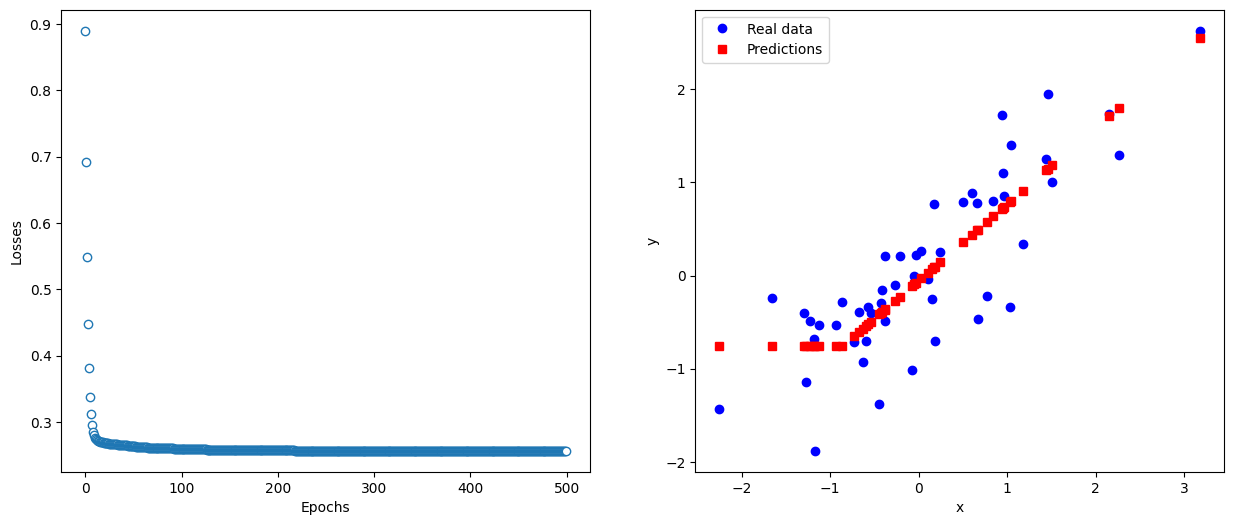

In [49]:
x, y = create_data(0.8)
preds, losses = build_and_train(x, y)

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].plot(losses.detach(), "o", linewidth=0.1, markerfacecolor="w")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Losses")

ax[1].plot(x, y, "ob", label="Real data")
ax[1].plot(x, preds.detach(), "sr", label="Predictions")
ax[1].set_xlabel("x")
ax[1].set_ylabel("y")
ax[1].legend()

plt.show()